### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [89]:
df = pd.read_csv('crime_data (1).csv')

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
len(df)

50

In [6]:
df.shape

(50, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [8]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [10]:
df.isnull().sum().sum()

0

In [11]:
df.duplicated().sum()

0

In [90]:
df.rename({'Unnamed: 0':'States'}, axis=1, inplace=True)
df.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
df.dtypes

States       object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

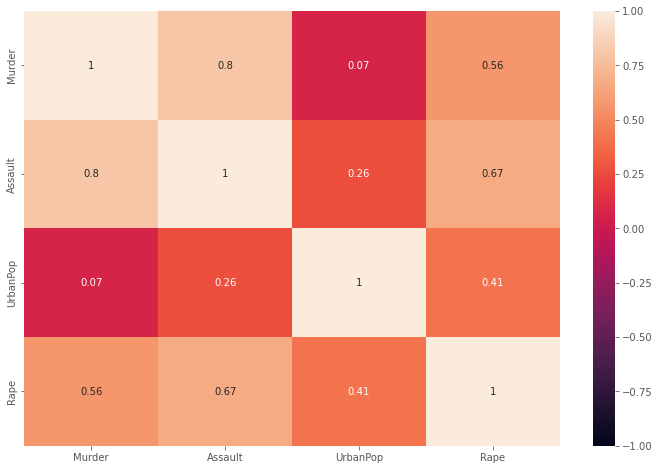

In [14]:
correlation = df.select_dtypes(include=['float64','int64']).corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation,
           vmin=-1,vmax=1,
           annot=True);

<font color='magenta'><b>There is high positive correlation between Murder and Assault and Rape and Assault also have correlation. The presence of Urban population has little effect on these crimes. 

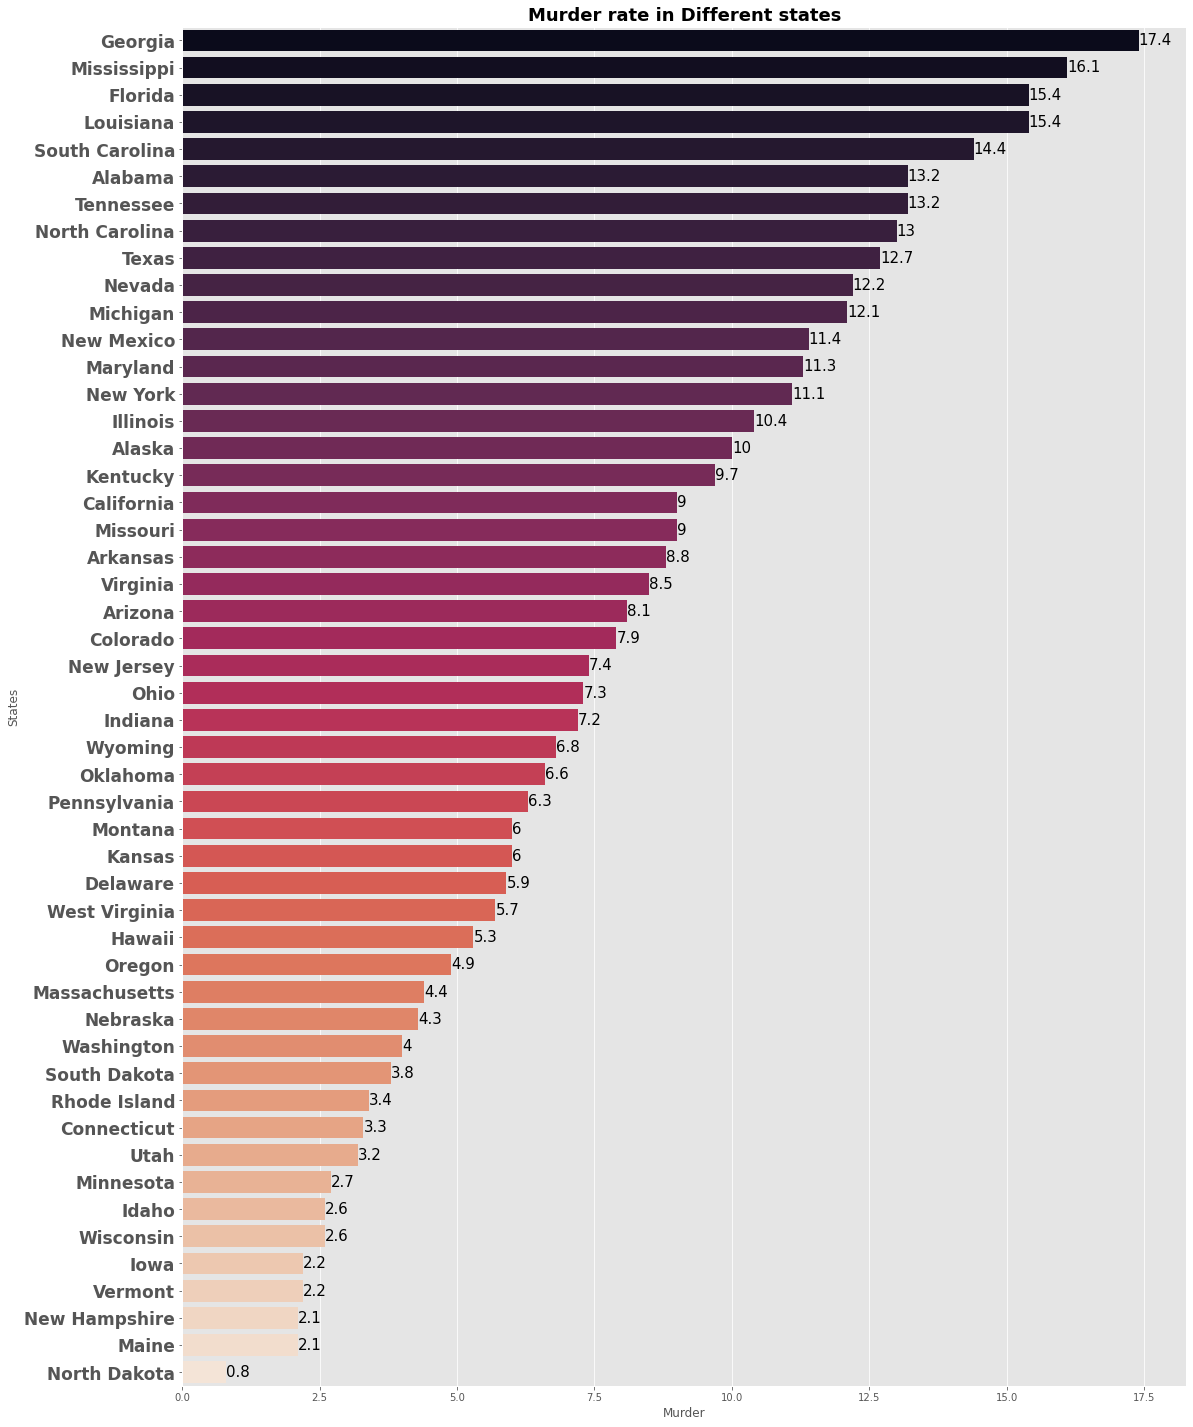

In [25]:
plt.figure(figsize = (18,25))
ax = sns.barplot(x = 'Murder', y = 'States', data=df.sort_values('Murder',ascending=False),palette='rocket')
plt.title('Murder rate in Different states',  fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=17,fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

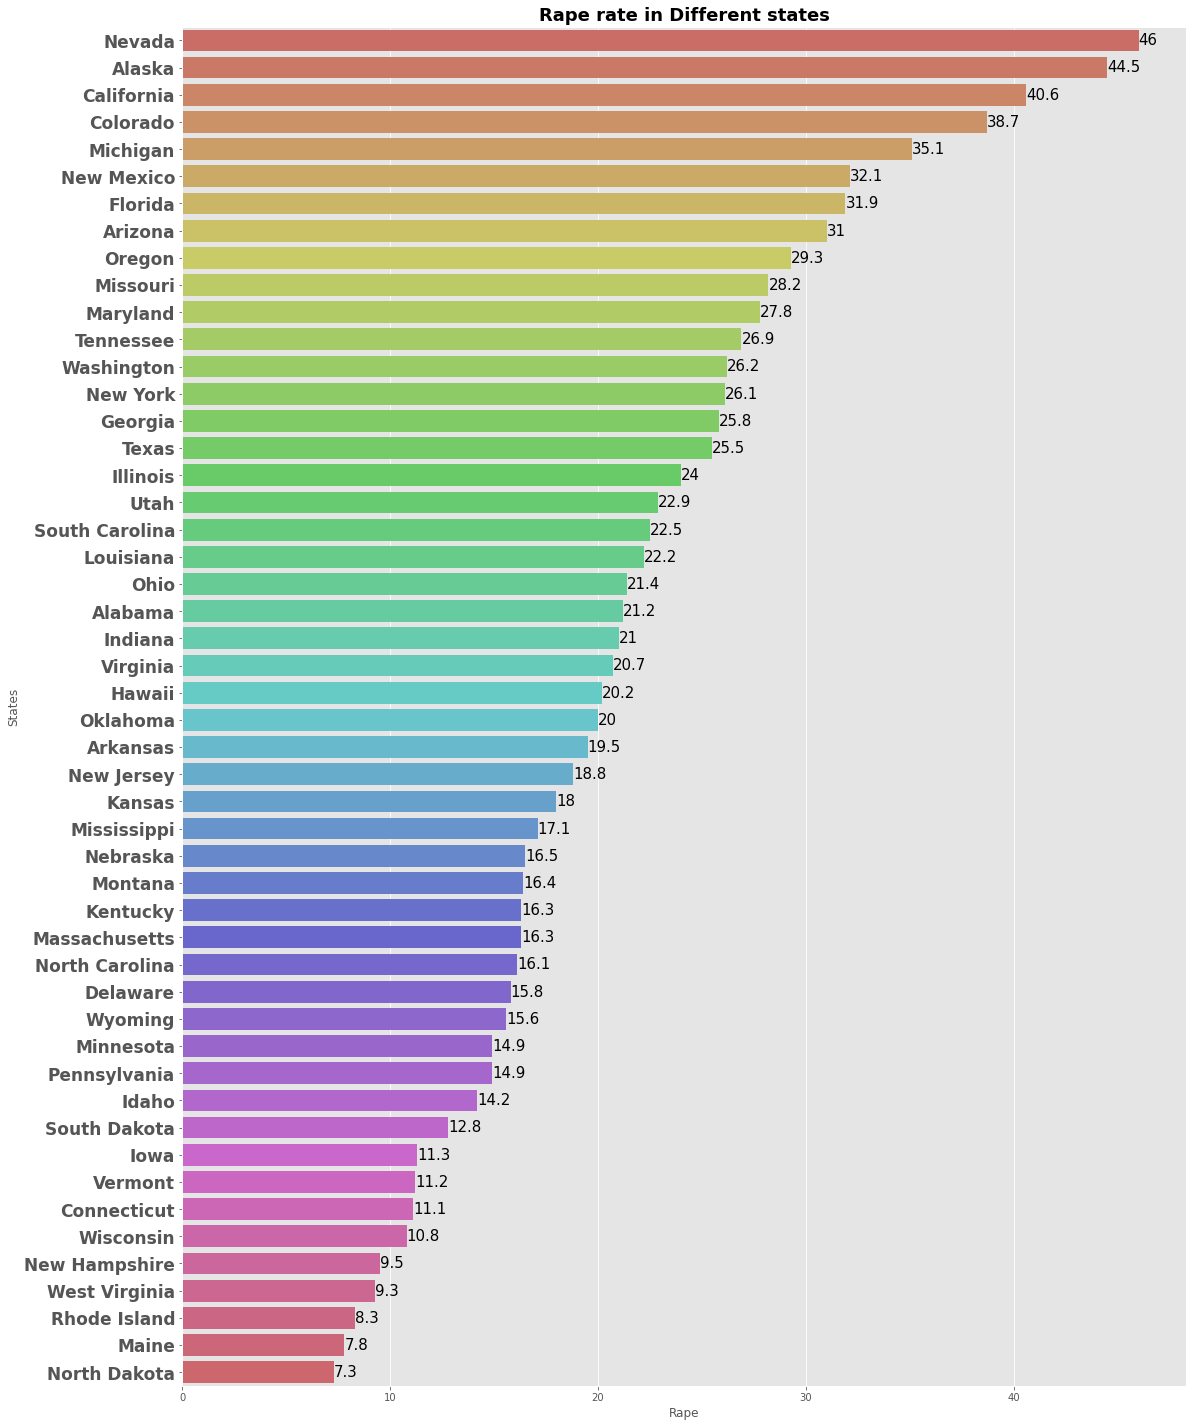

In [26]:
plt.figure(figsize = (18,25))
ax = sns.barplot(x = 'Rape', y = 'States', data=df.sort_values('Rape',ascending=False),palette='hls')
plt.title('Rape rate in Different states',  fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=17,fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

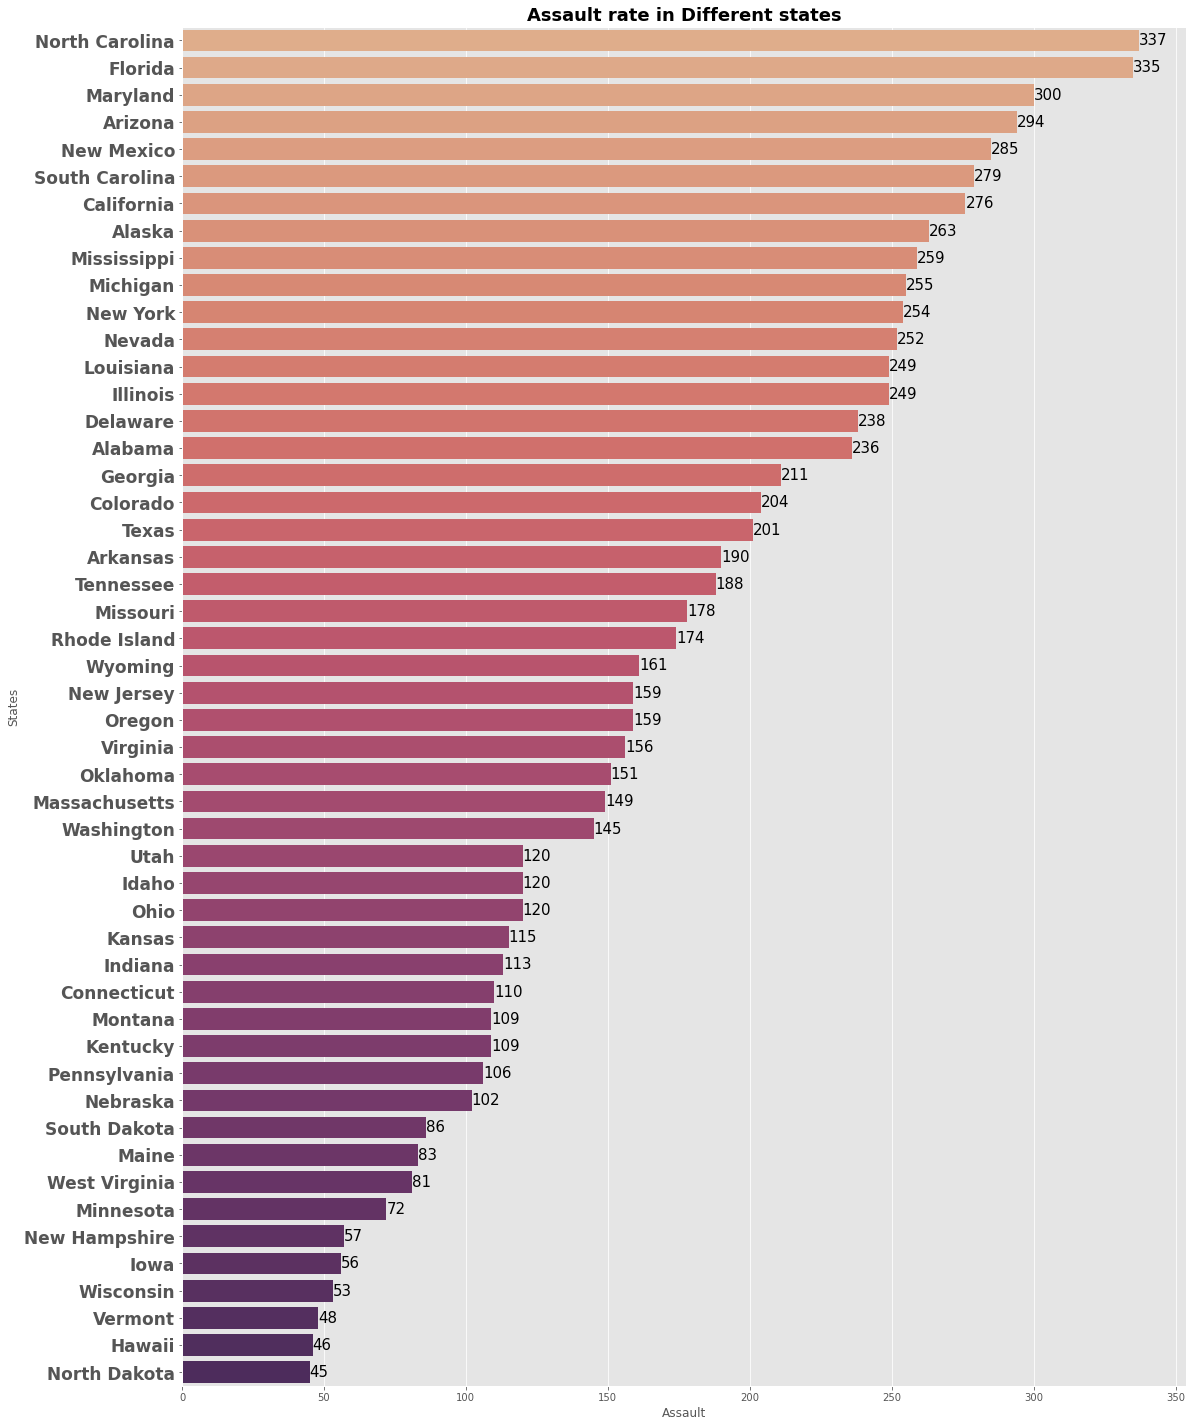

In [29]:
plt.figure(figsize = (18,25))
ax = sns.barplot(x = 'Assault', y = 'States', data=df.sort_values('Assault',ascending=False),palette='flare')
plt.title('Assault rate in Different states',  fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=17,fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

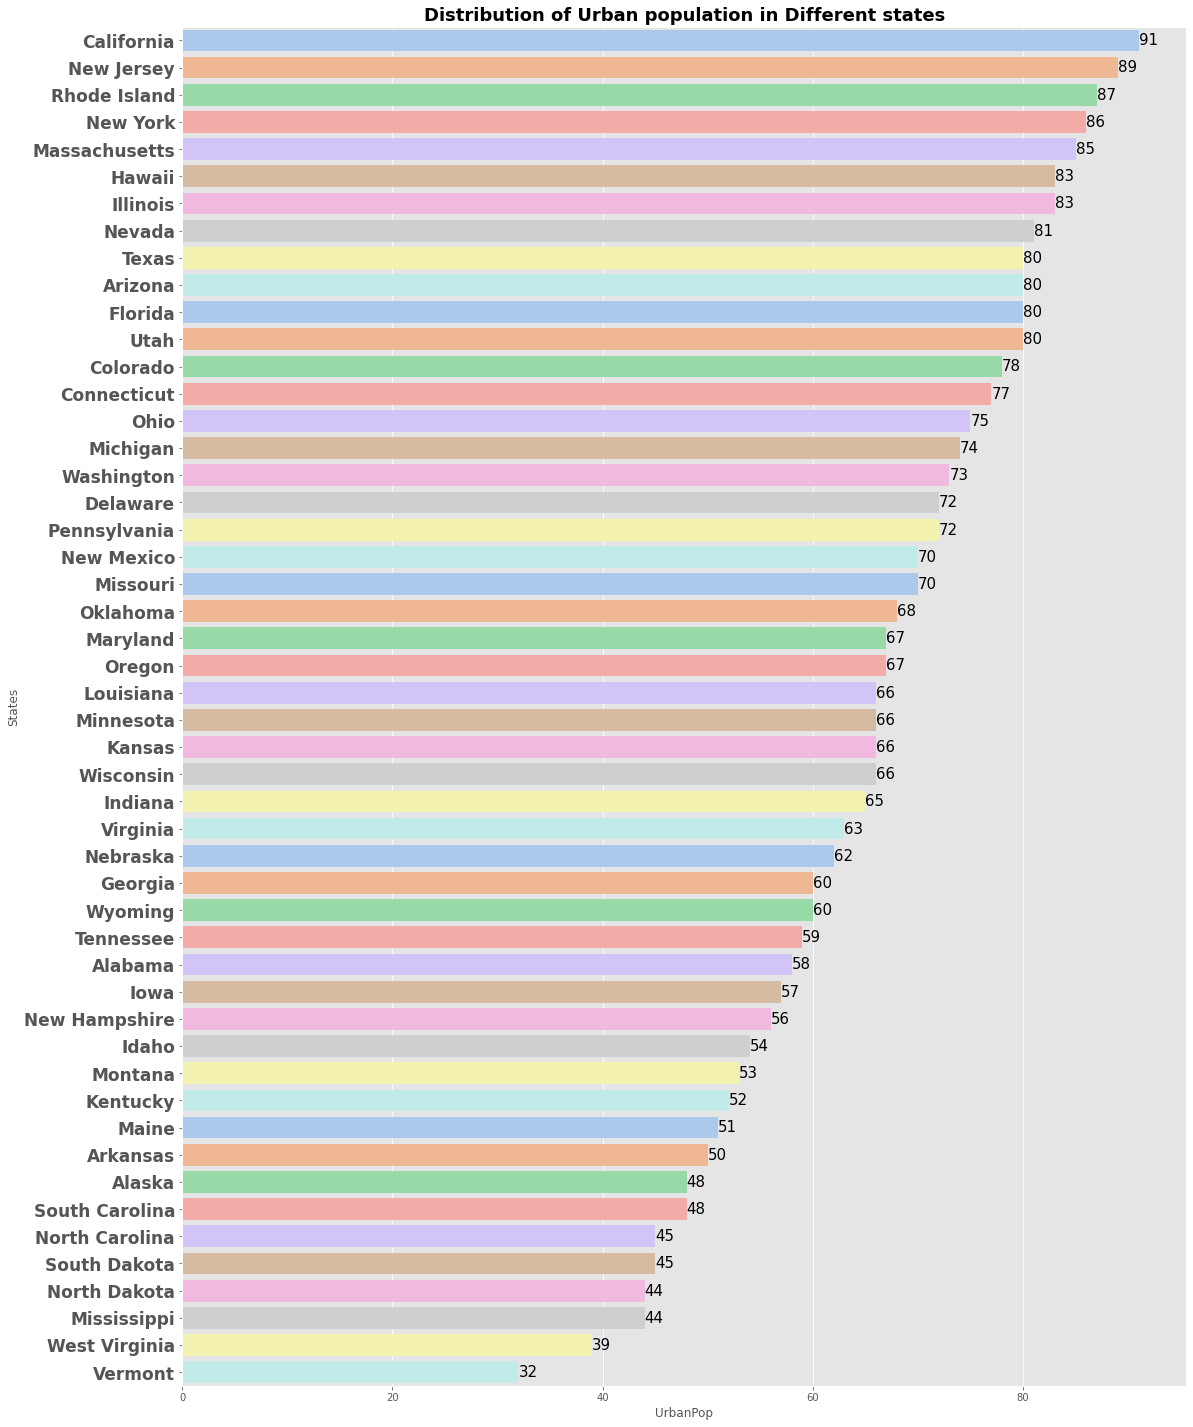

In [31]:
plt.figure(figsize = (18,25))
ax = sns.barplot(x = 'UrbanPop', y = 'States', data=df.sort_values('UrbanPop',ascending=False),palette='pastel')
plt.title('Distribution of Urban population in Different states',  fontsize = 18, fontweight = 'bold')
plt.yticks(fontsize=17,fontweight='bold')
for i in ax.containers:
    ax.bar_label(i,fontsize=15)

### <font color='green'><b>Feature Scaling :

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop('States', axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [33]:
df_scaled.describe().round(3)

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,0.421,0.431,0.568,0.360
std,0.262,0.285,0.245,0.242
min,0.000,0.000,0.000,0.000
25%,0.197,0.219,0.381,0.201
50%,0.389,0.390,0.576,0.331
75%,0.630,0.699,0.775,0.488
max,1.000,1.000,1.000,1.000


## <font color='purple'><b>Hierarchical Clustering :

### <font color='cyan'><b>To find the number of clusters :

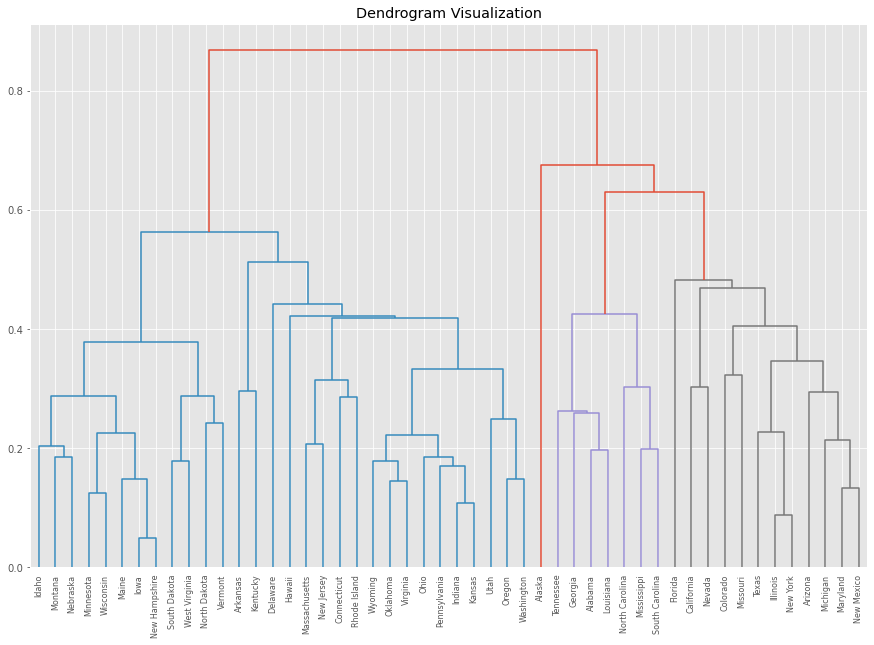

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(df_scaled, method='average')
plt.figure(figsize=(15, 10))
dendrogram(link, labels=df['States'].values)
plt.title('Dendrogram Visualization');

<font color='peach'><b>From the dendrogram the number of clusters is 2.

### <font color='orange'><b>Agglomerative Clustering :

In [37]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')

In [38]:
# get the cluster labels using fit_predict method of the agglo object
labels = agglo.fit_predict(df_scaled)
labels

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [56]:
# add cluster labels to the dataset
df_h = df.copy()
df_h['cluster_labels'] = labels
df_h.head()

,States,Murder,Assault,UrbanPop,Rape,cluster_labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [43]:
df_h.iloc[:,1:].groupby('cluster_labels').mean().round(2)

,Murder,Assault,UrbanPop,Rape
cluster_labels,,,,
0,12.16,255.25,68.40,29.16
1,4.87,114.43,63.63,15.94


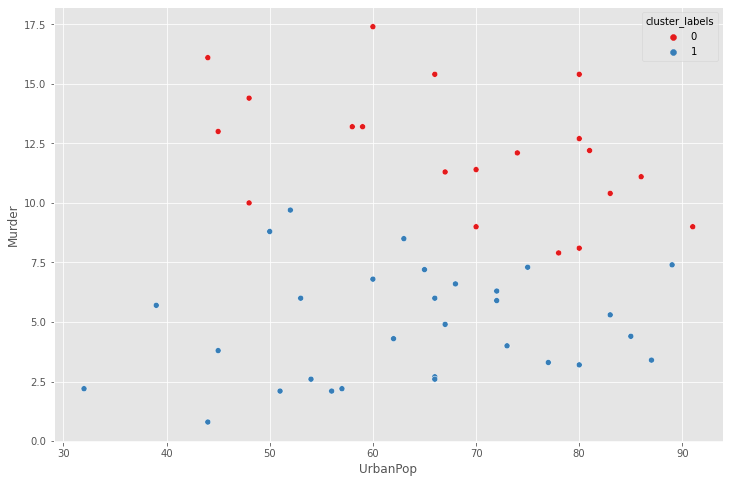

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='UrbanPop', y='Murder', data=df_h, hue='cluster_labels', palette='Set1');

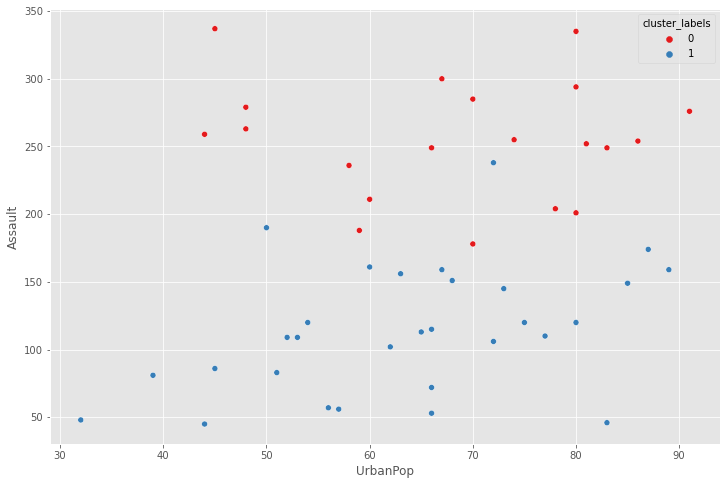

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='UrbanPop', y='Assault', data=df_h, hue='cluster_labels', palette='Set1');

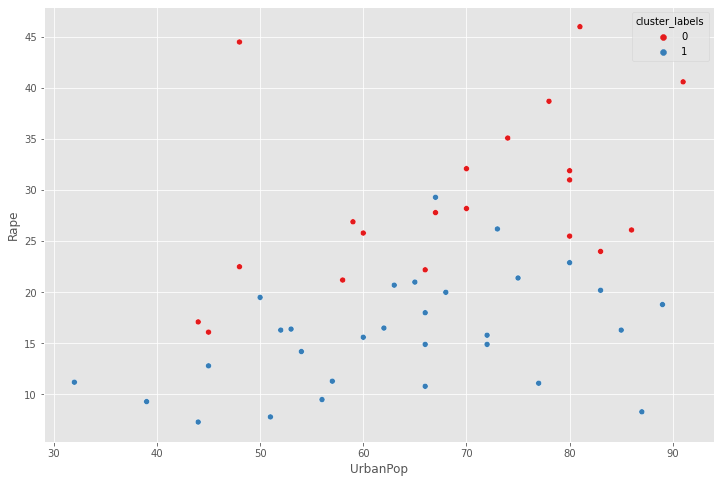

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='UrbanPop', y='Rape', data=df_h, hue='cluster_labels', palette='Set1');

<font color='peach'><b>cluster 1 states has more number of dots than cluster 0, means the crime rate is high in cluster 1 states.

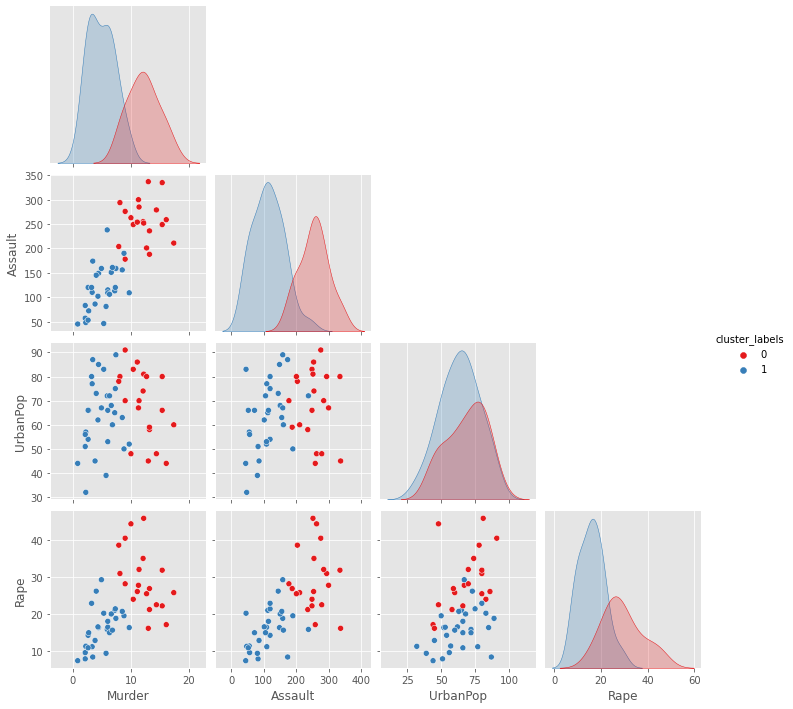

In [46]:
# plot the pairplot with hue based on cluster label
sns.pairplot(df_h, hue='cluster_labels', palette='Set1',corner=True);

<font color='peach'><b>From the plot, cluster 0 states are relatively safer than cluster 1 states.

## <font color='purple'><b>K-Means Clustering :

### <font color='green'><b>Feature Scaling :

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df = pd.DataFrame(scaled_df, columns=df.columns[1:])
scaled_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


### <font color='cyan'><b>Finding optimum number of clusters using Elbow method :

In [58]:
from sklearn.cluster import KMeans
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wss.append(kmeans.inertia_)

In [59]:
wss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.33327385184907,
 44.259807638112314,
 40.91266722247345,
 35.695877063333725,
 32.57509993011513,
 29.253498916734607]

### <font color='cyan'><b>Elbow curve :

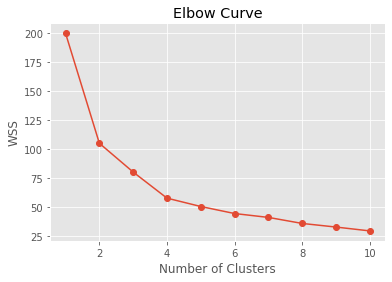

In [62]:
plt.plot(range(1,11), wss, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS');

<font color='peach'><b>From the plot, optimum number of clusters is 2.

### <font color='cyan'><b>K-Means Clustering with k=2 :

In [63]:
km2 = KMeans(n_clusters=2, random_state=42)
km2.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

In [64]:
# add labels to the original dataset as a new column
labels = km2.labels_
labels

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [68]:
df_k = df.copy()
df_k['k_cluster_labels'] = labels
df_k.head()

,States,Murder,Assault,UrbanPop,Rape,k_cluster_labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [69]:
# cluster profiles
df_k.iloc[:,1:].groupby('k_cluster_labels').mean()

,Murder,Assault,UrbanPop,Rape
k_cluster_labels,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


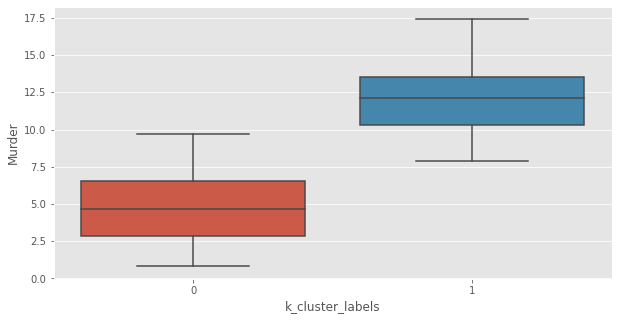

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x='k_cluster_labels', y='Murder', data=df_k);

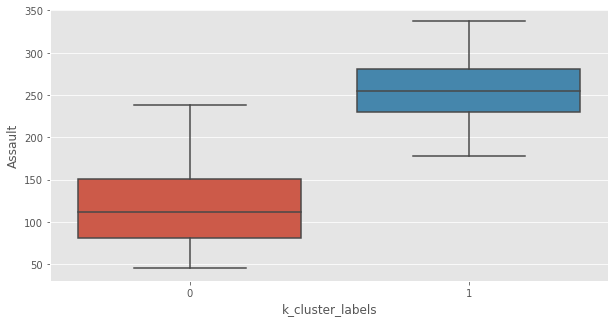

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x='k_cluster_labels', y='Assault', data=df_k);

<AxesSubplot:xlabel='k_cluster_labels', ylabel='Rape'>

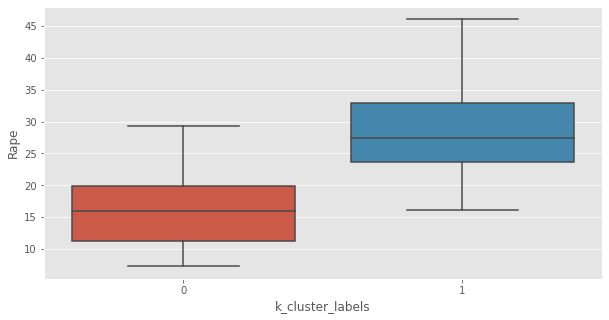

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x='k_cluster_labels', y='Rape', data=df_k)

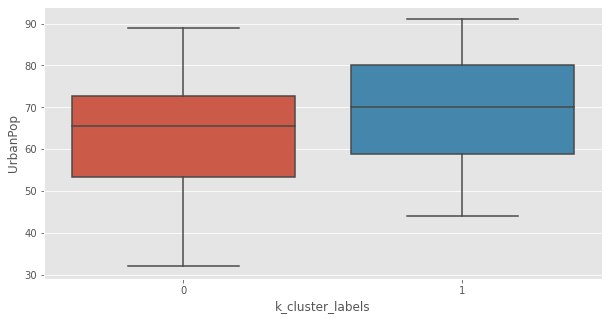

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(x='k_cluster_labels', y='UrbanPop', data=df_k);

<font color='peach'><b>cluster 0 states are relatively safer than cluster 1 and also cluster 0 states have lesser urban population than cluster 1 states.

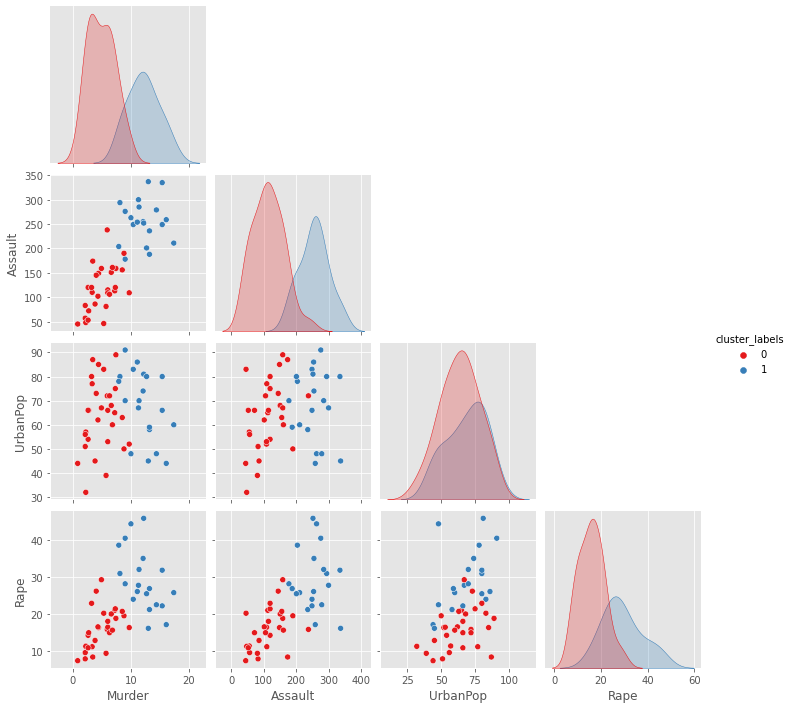

In [67]:
# plot a pairplot with cluster label as hue
sns.pairplot(df_k, hue='cluster_labels', palette='Set1',corner=True);

### <font color='hotpink'><b>Silhouette Score :

In [77]:
ss = []
from sklearn.metrics import silhouette_score
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_df)
    ss.append(silhouette_score(scaled_df, km.labels_))

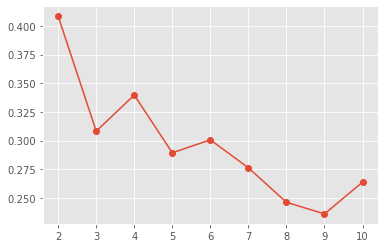

In [78]:
plt.plot(range(2,11), ss, marker='o');

<font color='peach'><b>we can see silhouette score is highest when k=2 .

## <font color='purple'><b>DBSCAN :

In [79]:
from sklearn.cluster import DBSCAN

### <font color='cyan'><b>To find Epsilon value :

In [80]:
from sklearn.neighbors import NearestNeighbors

In [92]:
scaled_df1 = scaled_df.copy()
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_df1)
distances, indices = neighbors_fit.kneighbors(scaled_df)

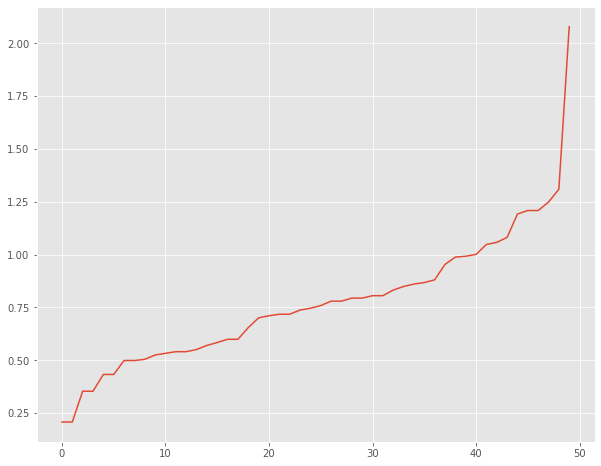

In [93]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

<font color='peach'><b>From the plot the point where knee occurs is approx. 1.25.

### <font color='cyan'><b>DBSCAN with epsilon=1.25 :

In [109]:
from collections import Counter

In [143]:
labels = DBSCAN(eps=1.25).fit(scaled_df1).labels_
clusters = len(Counter(labels))
print(f"Number of clusters: {clusters}")
print(f"Number of outliers: {Counter(labels)[-1]}")
print(f"Silhouette_score: {silhouette_score(scaled_df1, labels)}")

Number of clusters: 4
Number of outliers: 6
Silhouette_score: 0.23869670053300915


In [144]:
labels

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [145]:
df_db = df.copy()
df_db['dbscan_labels'] = labels
df_db.head()

,States,Murder,Assault,UrbanPop,Rape,dbscan_labels
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1


In [146]:
df_db.dbscan_labels.value_counts()

 2    32
 1     7
-1     6
 0     5
Name: dbscan_labels, dtype: int64

In [148]:
df_db.groupby('dbscan_labels').mean().round(2)

,Murder,Assault,UrbanPop,Rape
dbscan_labels,,,,
-1,12.62,287.00,64.83,32.70
0,14.72,232.60,58.20,23.72
1,10.33,263.00,76.86,30.69
2,5.24,119.12,64.34,16.62


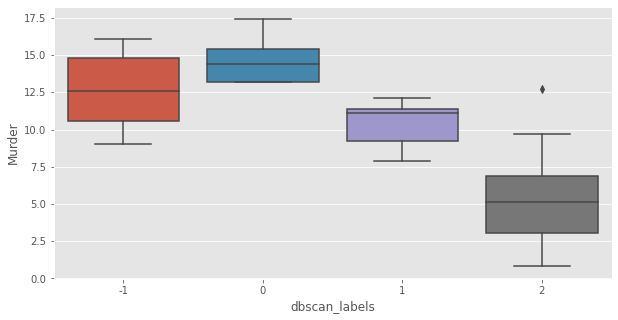

In [150]:
plt.figure(figsize=(10,5))
sns.boxplot(x='dbscan_labels', y='Murder', data=df_db);

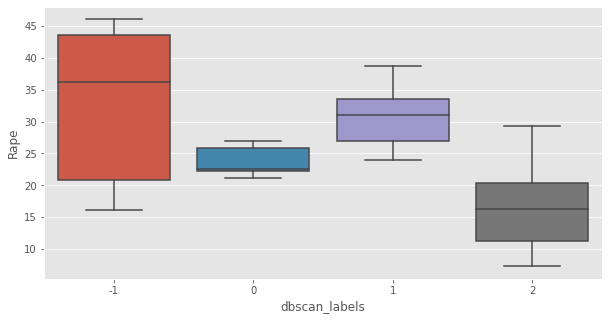

In [151]:
plt.figure(figsize=(10,5))
sns.boxplot(x='dbscan_labels', y='Rape', data=df_db);

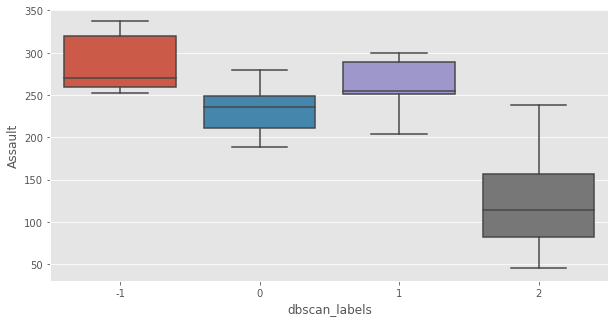

In [152]:
plt.figure(figsize=(10,5))
sns.boxplot(x='dbscan_labels', y='Assault', data=df_db);

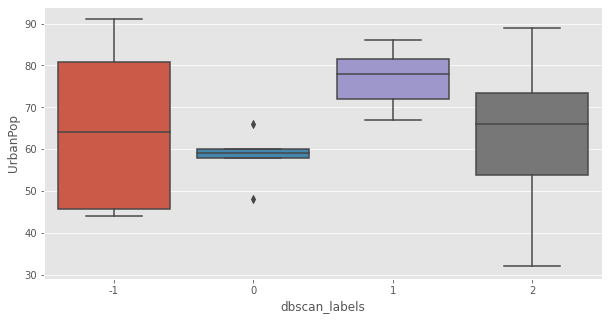

In [149]:
plt.figure(figsize=(10,5))
sns.boxplot(x='dbscan_labels', y='UrbanPop', data=df_db);

<font color='peach'><b>From the above plots, dbscan has formed 4 clusters among which cluster 0 states are the safest ones.